In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Rappel du sujet

- 15 actifs min et 40 max
- chaque actif ne doit pas etre superieux a 10% du portefeuille

# Manager API

In [3]:

class RESTManager:
    HOST_NAME = "dolphin.jump-technology.com"
    PORT = "8443"

    URL = "https://" + HOST_NAME + ":" + PORT + "/api/v1/"

    USERNAME_USER1 = "EPITA_GROUPE8"
    PASSWORD_USER1 = "AgLyQx64Jw6pAkW9"

    auth = (USERNAME_USER1, PASSWORD_USER1)


    def get(self, path):
        return requests.get(self.URL+path, auth=self.auth, verify=False).text
    
    def post(self, path, data):
        
        return requests.put(self.URL+path, auth=self.auth, data=data, verify=False)
    
    def get_asset(self):
        dt_text = self.get("asset")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        return df
    
    def get_asset_id(self, uid):
        dt_text = self.get(f"asset/{uid}")
        dt = json.loads(dt_text)
        df={}
        for key in dt:
            df[key] = dt[key]["value"]
        #df = pd.DataFrame(df)
        return df
    
    def get_asset_id_quote(self, uid):
        dt_text = self.get(f"asset/{uid}/quote")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
        #l = ["ask" ,"asset" ,"bid" ,"close" ,"feed_source" ,"gross" ,"high" ,"low","nav" ,"open", "pl" ,"real_close_price" ,"return" ,"volume"]
        l = ["return","nav"]
        for elt in l:
            df[elt] = df[elt].str.replace(',', '.').astype(float)
        return df
    
    def get_ratio(self):
        self.get("ratio")
    
    def sharpe(self, df, taux_sans_risque, periode=30):
        df['Log_Ret'] = np.log(df['close'] / df['close'].shift(1))
        df['Volatility'] = df['Log_Ret'].rolling(window=periode).std() * np.sqrt(periode)
        sharpe = (df["return"] - taux_sans_risque["1 mois"])/df["Volatility"]
        return sharpe
    
    def get_portfolio(self):
        resp = self.get("portfolio/1827/dyn_amount_compo")
        return resp

    def push(self, data):
        return self.post("portfolio/1827/dyn_amount_compo", data)
        

req = RESTManager()

In [4]:
portfolio = req.get_portfolio()
portfolio

'{"label":"EPITA_PTF_8","currency":{"code":"EUR"},"type":"front","values":{"2016-06-01":[{"asset":{"asset":2024,"quantity":2.0}}]}}'

In [5]:
df_asset = req.get_asset()
df_asset

,ASSET PRICE MODE,ASSET_DATABASE_ID,ASSET_MARKET_SUB_GROUP,ASSET_OR_MARKET_PLACE_COUNTRY,ASSET_STATUS,BLOOMBERG_CODE,BLOOMBERG_ID,BOND_CREDIT_RISK_COMPUTATION_MODE,BOND_RISK_COMPUTATION_MODE,BOND_WAL_COMPUTATION_MODE,...,asset_fund_info_redemption_frequency,asset_fund_info_reuters_code,asset_fund_info_strategy,asset_fund_info_subscription_committee,asset_fund_info_subscription_frequency,asset_fund_info_valoren_code,asset_fund_info_valorisation_frequency,asset_fund_info_vl_date,asset_fund_info_vl_known,quote_value_type
0,Par Défaut (configuration),1845,NaN,Allemagne,normal,DRI GY EQUITY,BBG000BD8RR1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Défaut
1,Par Défaut (configuration),1846,Euronext Growth,France,normal,ALMIL FP EQUITY,BBG000M1HS93,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Défaut
2,Par Défaut (configuration),2122,NaN,France,normal,VEGCEQD FP EQUITY,BBG000NBHV66,Par défaut,Par défaut,Par défaut,...,NaN,NaN,Blend,NaN,NaN,NaN,Journalière,Journalière(Tous) - (Français (France)/0/Aucun...,NaN,Défaut
3,Par Défaut (configuration),2123,NaN,France,normal,SGPPEA2 FP EQUITY,BBG000Q6B219,Par défaut,Par défaut,Par défaut,...,NaN,NaN,Blend,"0,01",NaN,NaN,Journalière,Journalière(Tous) - (Français (France)/0/Aucun...,false,Défaut
4,Par Défaut (configuration),2124,NaN,France,normal,SGPRIV1 FP EQUITY,BBG000NFZ9R3,Par défaut,Par défaut,Par défaut,...,NaN,NaN,Moderate Allocation,NaN,NaN,NaN,Journalière,Journalière(Tous) - (Français (France)/0/Aucun...,false,Défaut
5,Par Défaut (configuration),1428,NaN,France,normal,AAACSII FP EQUITY,NaN,Par défaut,Par défaut,Par défaut,...,NaN,LP60099722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Défaut
6,Par Défaut (configuration),1847,Reg. Mkt - Segment A,Pays-Bas,normal,AALB NA EQUITY,BBG001V72X75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Défaut
7,Par Défaut (configuration),1848,NaN,Allemagne,normal,ARL GY EQUITY,BBG000MT6Y82,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Défaut
8,Par Défaut (configuration),1849,Reg.Mkt - Segment B,France,normal,ABCA FP EQUITY,BBG005YV6GR1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Défaut
9,Par Défaut (configuration),2154,NaN,Luxembourg,normal,ABGCHA2 LX EQUITY,BBG000C22B04,Par défaut,Par défaut,Par défaut,...,Journalière,NaN,Blend,"0,0638",Journalière,NaN,Journalière,NaN,NaN,Défaut


In [6]:
df_asset[["ASSET_DATABASE_ID", "CURRENCY","MARKET_PLACE_CURRENCY", "TYPE"]]

,ASSET_DATABASE_ID,CURRENCY,MARKET_PLACE_CURRENCY,TYPE
0,1845,EUR,EUR,STOCK
1,1846,EUR,EUR,STOCK
2,2122,EUR,EUR,FUND
3,2123,EUR,EUR,FUND
4,2124,EUR,EUR,FUND
5,1428,EUR,EUR,FUND
6,1847,EUR,EUR,STOCK
7,1848,EUR,EUR,STOCK
8,1849,EUR,EUR,STOCK
9,2154,USD,EUR,FUND


In [7]:
print(req.get_asset_id("2122"))
print(req.get_asset_id("1845"))

{'REST_OBJECT_ID': '2122', 'REST_UNIQUE_NUMBER': '2122', 'LABEL': '1818-VEGA EUR CO', 'TYPE': 'FUND', 'CURRENCY': 'EUR', 'BLOOMBERG_CODE': 'VEGCEQD FP EQUITY', 'ISIN_CODE': 'FR0010626796', 'SUB_SECTOR': 'Instruments de placement hors actions', 'MARKET_PLACE': 'No Place', 'COUNTRY': 'France', 'IS_PUBLICLY_TRADED': 'true', 'ELIGIBLE_PEA': 'true', 'QUOTE_TYPE': 'value', 'IS_STRUCTURED_PRODUCT': 'false', 'IS_DEPOSITARY_QUOTES': 'false', 'IS_ACCESSIBILITY_PUBLIC': 'true', 'ASSET_STATUS': 'normal', 'CITY_OR_ACRONYM_OR_NAME': 'no_place', 'SUB_TYPE': 'OPCVM', 'TRANSPARENCY_LIST': '', 'CODE_CIC': 'XL41', 'BOND_RISK_COMPUTATION_MODE': 'Par défaut', 'LIQUIDITY_ALGO': 'PerVolLiquidityAlgorithm', 'BLOOMBERG_ID': 'BBG000NBHV66', 'quote_value_type': 'Défaut', 'ASSET PRICE MODE': 'Par Défaut (configuration)', 'PAY_ACCOUNT_ON_DEFAULT': 'false', 'ELIGIBLE_PEA_PME': 'true', 'ASSET_DATABASE_ID': '2122', 'EMIR_CLEARING_ID_TYPE': 'LEI', 'BOND_CREDIT_RISK_COMPUTATION_MODE': 'Par défaut', 'BOND_YTM_COMPUTATIO

In [8]:
req.get("ratio")

'[{"id":11,"type":"Ratio","name":"Correlation","is_benchmark_needed":true,"is_percent":false},{"id":7,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":15,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":8,"type":"Ratio","name":"RDT","is_benchmark_needed":false,"is_percent":true},{"id":13,"type":"Ratio","name":"Rendement","is_benchmark_needed":false,"is_percent":true},{"id":9,"type":"Ratio","name":"Rendement_annualise","is_benchmark_needed":false,"is_percent":true},{"id":12,"type":"Ratio","name":"Sharpe","is_benchmark_needed":false,"is_percent":false},{"id":14,"type":"Ratio","name":"VaR historique","is_benchmark_needed":false,"is_percent":true},{"id":10,"type":"Ratio","name":"Volatilite","is_benchmark_needed":false,"is_percent":true}]'

In [9]:
dt_text = req.get(f"asset/1845/quote")
dt = json.loads(dt_text)
pd.DataFrame(dt)
df = []
for i in range(len(dt)):
    tmp = {}
    for key in dt[i]:
        tmp[key] = dt[i][key]["value"]
    df.append(tmp)
df = pd.DataFrame(df)
df

,ask,asset,bid,close,date,feed_source,gross,high,low,nav,open,pl,real_close_price,return,volume
0,"12,58",1845,"12,58","12,585",2013-06-03,-10,"12,585","12,67","12,08","12,585","12,6",0,"12,585",0,742280
1,"12,67",1845,"12,59","12,67",2013-06-04,-10,"12,67","12,95","12,5","12,67","12,65","0,085","12,67","0,006754072308",544604
2,"12,37",1845,"12,295","12,35",2013-06-05,-10,"12,35","12,66","12,34","12,35","12,579","-0,32","12,35","-0,025256511444",649313
3,"12,37",1845,"12,355","12,355",2013-06-06,-10,"12,355","12,45","12,25","12,355","12,35","0,005","12,355","0,0004048583",371998
4,"12,555",1845,"12,475","12,48",2013-06-07,-10,"12,48","12,63","12,25","12,48","12,35","0,125","12,48","0,010117361392",303439
5,"12,495",1845,"12,415","12,43",2013-06-10,-10,"12,43","12,625","12,37","12,43","12,445","-0,05","12,43","-0,004006410256",210296
6,"12,445",1845,"12,38","12,405",2013-06-11,-10,"12,405","12,481","12,265","12,405","12,37","-0,025","12,405","-0,002011263073",285197
7,"12,325",1845,"12,3","12,3",2013-06-12,-10,"12,3","12,435","12,28","12,3","12,375","-0,105","12,3","-0,0084643289",310978
8,"12,125",1845,"12,05","12,01",2013-06-13,-10,"12,01","12,32","11,715","12,01","12,235","-0,29","12,01","-0,023577235772",1020589
9,"12,13",1845,"12,075","12,12",2013-06-14,-10,"12,12","12,17","12,01","12,12","12,01","0,11","12,12","0,009159034138",312048


In [85]:
dt_text = req.get(f"asset/2122/quote")
dt = json.loads(dt_text)
pd.DataFrame(dt)
df = []
for i in range(len(dt)):
    tmp = {}
    for key in dt[i]:
        tmp[key] = dt[i][key]["value"]
    df.append(tmp)
df = pd.DataFrame(df)
df

,asset,close,date,feed_source,gross,nav,pl,real_close_price,return
0,2122,"31,098",2013-06-03,-10,"31,098","31,098",0,"31,098",0
1,2122,"31,166",2013-06-04,-10,"31,166","31,166","0,068","31,166","0,002186635797"
2,2122,"30,793",2013-06-05,-10,"30,793","30,793","-0,373","30,793","-0,011968170442"
3,2122,"30,478",2013-06-06,-10,"30,478","30,478","-0,315","30,478","-0,010229597636"
4,2122,"30,909",2013-06-07,-10,"30,909","30,909","0,431","30,909","0,014141347857"
5,2122,"30,924",2013-06-10,-10,"30,924","30,924","0,015","30,924","0,000485295545"
6,2122,"30,492",2013-06-11,-10,"30,492","30,492","-0,432","30,492","-0,013969732247"
7,2122,"30,464",2013-06-12,-10,"30,464","30,464","-0,028","30,464","-0,000918273646"
8,2122,"30,384",2013-06-13,-10,"30,384","30,384","-0,08","30,384","-0,00262605042"
9,2122,"30,457",2013-06-14,-10,"30,457","30,457","0,073","30,457","0,002402580305"


# Optimisation de portefeuille

In [12]:
def sharpe(w,mat_return):
    mat_cov = np.cov(mat_return)# * mat_return.shape[1]


    if w.ndim != 1:
        variance = []
        for i in range(w.shape[0]):
            variance.append(w[i] @ mat_cov @ w[i].T)
    else:
        variance = w @ mat_cov @ w.T
        
    variance = np.array(variance)
    std = np.sqrt(variance)
    average_rend = mat_return.mean(axis=1)
    
    return (variance, std, average_rend@w.T)


# rendement & volatilité

Commençons par calculer la volatilité et le rendement de chaque actif pour pouvoir etablir un classement.

## 1) Récuperation des rendements

In [ ]:
list_id = df_asset["ASSET_DATABASE_ID"].values
l_id = []

#Pour avoir l'index
a = req.get_asset_id_quote(list_id[0])[["return"]]
list_return = pd.DataFrame(index=a.index)
list_nav = pd.DataFrame(index=a.index)


for elt in list_id:
    try:
        df_tmp = req.get_asset_id_quote(elt)
        list_return[elt] = df_tmp["return"]
        list_nav[elt] = df_tmp["nav"]
        l_id.append(elt)
    except:
        pass
l_id = np.array(l_id)
list_nav = list_nav.fillna(method='ffill')

In [89]:
print(l_id.shape)
print(list_return.shape)

(472,)
(1898, 472)


on veut le rendement sur 2016-06-01 jusqu'a 2020-09-30

In [99]:
import datetime as dt
start = dt.datetime.strptime('2016-06-01', '%Y-%m-%d')
end = dt.datetime.strptime('2020-09-30', '%Y-%m-%d')
sdf = (list_return.index > start) & (list_return.index < end)

l_return = list_return.loc[sdf]
l_return = l_return.fillna(method='bfill')

## 2) Classement

In [100]:
rend_l = l_return.values.mean(axis=0)
std_l = l_return.values.std(axis=0)
rend_l.shape

(472,)

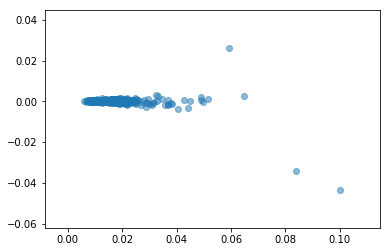

In [101]:
plt.scatter(std_l,rend_l, alpha=0.5)

In [102]:
sort_rend = np.argsort(rend_l)
sort_std = np.argsort(std_l)

#classement
classement = np.zeros_like(sort_rend)
for i in range(len(sort_rend)):
    classement[sort_rend[i]] += i*20
    classement[sort_std[len(sort_rend)-1-i]] += i

## 3) optimization (n=2) [a la main]

[298 199]
[0.05910114 0.01237531] [0.02605254 0.00145298]


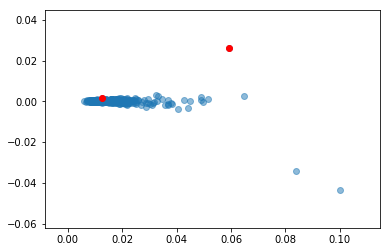

In [103]:
res = np.argsort(classement)[-2:]
print(res)
print(std_l[res],rend_l[res])

plt.scatter(std_l,rend_l, alpha=0.5)
plt.scatter(std_l[res],rend_l[res], c="red")

[298 199] [0.02605254 0.00145298]
rend: -0.0005785744284033129 & volatilité: 0.015081764292989129 -> poid: [0.37373737 0.62626263]


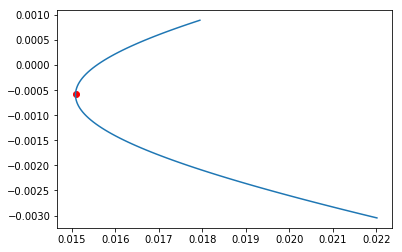

In [104]:
print(res,rend_l[res])

mat_return = np.array(l_return.values[res])
mat_return = np.nan_to_num(mat_return)

w = np.linspace(0, 1, num=100)
W = np.array([w, 1-w]).T

variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)
print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {W[minimum]}")

plt.plot(std,rend)
plt.scatter(std[minimum], rend[minimum], c="red")

## Optimization (n=3) [a la main]

[311 298 199]


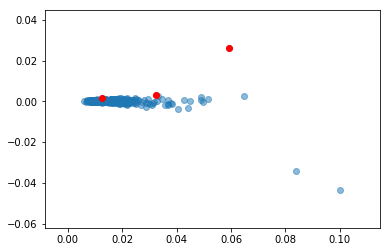

In [105]:
import itertools

w = np.linspace(0, 1, num=100)

n_w = np.array(list(itertools.permutations(w, 3)))

n_w = n_w[np.sum(n_w,axis=1) == 1]

res = np.argsort(classement)[-3:]
print(res)

plt.scatter(std_l,rend_l, alpha=0.5)
plt.scatter(std_l[res],rend_l[res], c="red")

In [106]:
mat_return = np.array(l_return.values[res])
mat_return = np.nan_to_num(mat_return)

variance, std, rend = sharpe(n_w, mat_return)

rend: -0.0013221268500624465 & volatilité: 0.012526589283446622 -> poid: [0.4040404  0.18181818 0.41414141]


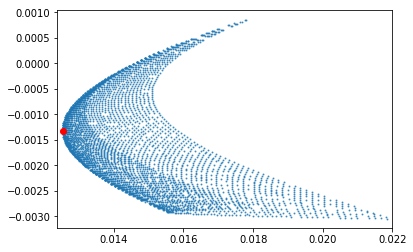

In [107]:
minimum = np.argmin(std)

print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {n_w[minimum]}")

plt.margins(x=0, y=-0.01)
plt.scatter(std,rend,s=1, alpha=0.7)
plt.scatter(std[minimum], rend[minimum], c="red")

# Optimization (minimal var) [avec Resolution analytique]

> https://www.ephiquant.com/optimisation-de-portefeuille-modele-mean-variance-de-markowitz/

on cherche a optimiser le programme quadratique suivant

$$ 
 \left\{
    \begin{array}{ll}
       Min \ \sigma^2_p(w) = w^T\sigma w \\
       w^Tu = 1
    \end{array}
\right.$$

on va utiliser la méthode du multiplicateur de Lagrange:

$$
\mathcal{L}(\omega,\lambda) = \omega^\top \sigma \omega - \lambda(\omega^\top u-1)
$$

> où $\lambda$ est le multiplicateur de Lagrange

Nous allons ensuite calculer les dérivées partielles que nous allons spécifier égales à 0 : 

$$
\begin{cases} \frac{\partial\mathcal{L}}{\omega}= 2\sigma\omega-\lambda u=0 \quad \text{(a)}\\  \frac{\partial\mathcal{L}}{\partial\lambda}=\omega^\top u-1=0 \quad\quad\text{(b)}\end{cases}
$$

Nous allons d’abord tirer $\omega$ dans l’équation (a), après quoi nous allons le remplacer dans l’équation (b) par son expression: 

$$
\begin{split} \text{(a)} \quad 2\sigma\omega-\lambda u=0\quad  \implies \omega &= \frac{1}{2}\lambda\sigma^{-1}u \\ \text{(b)} \quad \omega^\top u-1=0 \implies \omega^\top u &= 1 \\ \frac{1}{2}\lambda u^\top\sigma^{-1}u &=1 \\  \lambda &= \frac{2}{u^\top\sigma^{-1}u} \end{split}
$$

Nous allons mettre cette dernière expression de $\lambda$ dans l’expression de $\omega$. Cela donnera ceci : 

$$
\begin{equation*}\omega=\frac{1}{2} \bigg(\frac{2}{u^{\top}\sigma^{-1}u} \bigg) \sigma^{-1}u \implies \omega=\frac{\sigma^{-1}u}{u^\top\sigma^{-1}u} \end{equation*}
$$

In [108]:
# u = [1, ..., 1]

In [109]:
res = np.argsort(classement)[-2:]
r = rend_l[res]
u = np.ones(r.shape[0])
mat_return = np.array(l_return.values[res])

sigma = np.cov(mat_return)

sigma_inv = np.linalg.inv(sigma) 

w = (sigma_inv @ u) / (u.T @ sigma_inv @ u)

w

array([0.37738509, 0.62261491])

rend: -0.0005785744284033129 & volatilité: 0.015081764292989129 -> poid: [0.37373737 0.62626263]
rend: -0.000592953012534298 & volatilité: 0.015081471466193635 -> poid: [0.37738509 0.62261491]


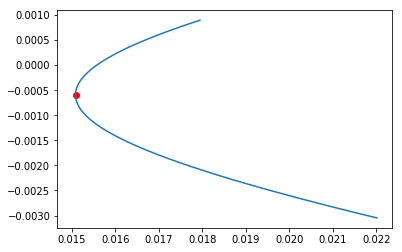

In [110]:
w_ = np.linspace(0, 1, num=100)
W = np.array([w_, 1-w_]).T


variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)

print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {W[minimum]}")

plt.plot(std,rend)

variance, std, rend = sharpe(w, mat_return)

plt.scatter(std, rend, c="red")
print(f"rend: {rend} & volatilité: {std} -> poid: {w}")

## resolution analytique avec les 15 meilleurs actifs

In [111]:
res = np.argsort(classement)[-20:]
r = rend_l[res]
u = np.ones(r.shape[0])
mat_return = np.array(l_return.values[res])

sigma = np.cov(mat_return)

sigma_inv = np.linalg.inv(sigma) 

w = (sigma_inv @ u) / (u.T @ sigma_inv @ u)

w

array([ 0.03646888,  0.11410153,  0.0421651 ,  0.15267894,  0.05746235,
        0.20320404,  0.0176575 ,  0.06339378,  0.0393215 ,  0.01518363,
       -0.02622009,  0.03834683, -0.03069607,  0.15843101,  0.01902081,
        0.05046343,  0.00462306,  0.05132896, -0.02646667,  0.01953146])

In [112]:
variance, std, rend = sharpe(w, mat_return)
print(f"rend: {rend} & volatilité: {std} -> poid: {w}")

rend: 0.0012871423037151095 & volatilité: 0.004674721925781999 -> poid: [ 0.03646888  0.11410153  0.0421651   0.15267894  0.05746235  0.20320404
  0.0176575   0.06339378  0.0393215   0.01518363 -0.02622009  0.03834683
 -0.03069607  0.15843101  0.01902081  0.05046343  0.00462306  0.05132896
 -0.02646667  0.01953146]


## Benchmark

Regardons l'influence du nombre d'actif sur le rendement et la volatilité.

[2] rend: -0.000592953012534298 & volatilité: 0.015081471466193635
[3] rend: -0.0013016990780355165 & volatilité: 0.012525992912514659
[4] rend: -0.0013886255400170318 & volatilité: 0.01163237399014768
[5] rend: 0.0024029308330623307 & volatilité: 0.009809685432506874
[6] rend: 0.002138728234875006 & volatilité: 0.009581114186238386
[7] rend: 0.002472285874227582 & volatilité: 0.0076011747365948325
[8] rend: 0.0026192826922778007 & volatilité: 0.007469921477893075
[9] rend: 0.0031079865828144526 & volatilité: 0.00731321819255622
[10] rend: 0.003452317813605257 & volatilité: 0.0072527208956768285
[11] rend: 0.004053530048107694 & volatilité: 0.006851237686385207
[12] rend: 0.0038657051363197217 & volatilité: 0.006696156410903569
[13] rend: 0.004020681207812574 & volatilité: 0.00646034802126801
[14] rend: 0.003951480307771974 & volatilité: 0.006361976961405872
[15] rend: 0.003063159578851783 & volatilité: 0.005884316847133233
[16] rend: 0.0028698375922011424 & volatilité: 0.0058124128351

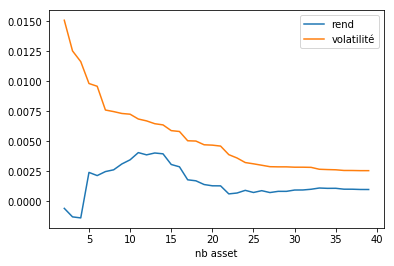

In [113]:
hist = []
for i in range(2,40,1):
    res = np.argsort(classement)[-i:]
    r = rend_l[res]
    u = np.ones(r.shape[0])
    mat_return = np.array(l_return.values[res])

    sigma = np.cov(mat_return)
    sigma_inv = np.linalg.inv(sigma) 

    w = (sigma_inv @ u) / (u.T @ sigma_inv @ u)
    variance, std, rend = sharpe(w, mat_return)
    print(f"[{i}] rend: {rend} & volatilité: {std}")
    hist.append([rend, std])

hist = np.array(hist)

plt.plot(range(2,40,1),hist[:,0], label="rend")
plt.plot(range(2,40,1),hist[:,1], label="volatilité")
plt.xlabel("nb asset")
plt.legend()

## Optimisation

In [114]:
res = np.argsort(classement)[-2:]
r = rend_l[res]
u = np.ones(r.shape[0])
mat_return = np.array(l_return.values[res])

sigma = np.cov(mat_return)
sigma_inv = np.linalg.inv(sigma) 

$$
\begin{equation*}\omega=E\mu_0+F\end{equation*}
$$

avec:

$$
E=\frac{1}{D}\sigma^{-1}(C\mu-Au)\quad \text{et} \quad F=\frac{1}{D}\sigma^{-1}(-A\mu+Bu)
$$


Nous allons définir 
- $A=u^\top\sigma^{-1}\mu=\mu^\top\sigma^{-1}u$ 
- $B=\mu^\top\sigma^{-1}\mu$ 
- $C=u^\top\sigma^{-1}u$
- $D=BC-A^2$

In [115]:
A = u.T @ sigma_inv @ r 
B = r.T @ sigma_inv @ r
C = u.T @ sigma_inv @ u
D = B*C - (A**2)

In [116]:
E = (1/D) * sigma_inv @ (C*r - A*u)
F = (1/D) * sigma_inv @ (-A*r + B*u)

w = E* 0.004 + F
w

array([0.10353923, 0.89646077])

In [117]:
variance, std, rend = sharpe(w, mat_return)
print(f"[{i}] rend: {rend} & volatilité: {std}")

[39] rend: 0.0004864930749211878 & volatilité: 0.016650260805452587


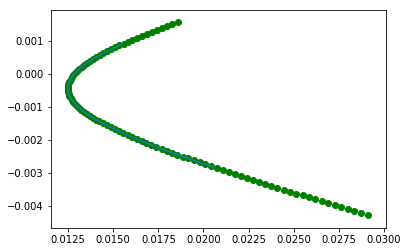

In [33]:
w_ = np.linspace(0, 1, num=100)
W = np.array([w_, 1-w_]).T


variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)
plt.plot(std,rend)

target_ = np.linspace(0.001, 0.005, num=100)
best = ""

for i in target_:
    w = E* i + F
    variance, std, rend = sharpe(w, mat_return)
    if std < rend:
        best = f"rend: {rend} & volatilité: {std}"
        plt.scatter(std, rend, c="red")
    else:
        plt.scatter(std, rend, c="green")
        
print(best)

En Rouge: rendement > risque  
En Vert : rendement < risque

## N=40

In [118]:
res = np.argsort(classement)[-15:]
mat_return = np.array(l_return.values[res])

In [119]:
def get_w(mat_return, u_t= 0.0017):
    r = mat_return.mean(axis=1)
    u = np.ones(r.shape[0])
    
    sigma = np.cov(mat_return)
    sigma_inv = np.linalg.inv(sigma) 
    
    A = u.T @ sigma_inv @ r 
    B = r.T @ sigma_inv @ r
    C = u.T @ sigma_inv @ u
    D = B*C - (A**2)
    
    E = (1/D) * sigma_inv @ (C*r - A*u)
    F = (1/D) * sigma_inv @ (-A*r + B*u)

    w = E* u_t + F
    return w


w_20 = get_w(mat_return, 0.003)
w_20

array([ 0.17893926,  0.08875435,  0.08323362,  0.05161144,  0.07363973,
        0.02779182,  0.07999436,  0.01734416,  0.17830749,  0.01757866,
        0.0338487 ,  0.02988418,  0.07907712, -0.00038356,  0.06037865])

rend: 0.003141414141414141 & volatilité: 0.004461577568650825


array([0.09696645, 0.07848591, 0.02623178, 0.06019571, 0.12254642,
       0.07360216, 0.12261855, 0.06061177, 0.02098976, 0.06346802,
       0.02784649, 0.06601166, 0.0785748 , 0.00013707, 0.10171346])

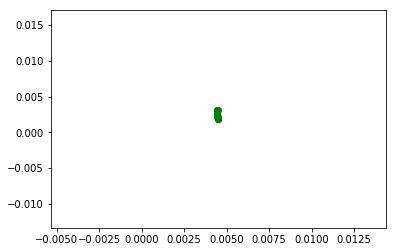

In [68]:
target_ = np.linspace(0.001, 0.005, num=100)
best = ""

for i in target_:
    w = get_w(mat_return, i)
    if all(element > 0  for element in w):
        W=w
        variance, std, rend = sharpe(w, mat_return)
        if std < rend:
            best = f"rend: {rend} & volatilité: {std}"
            plt.scatter(std, rend, c="red")
        else:
            best = f"rend: {rend} & volatilité: {std}"
            plt.scatter(std, rend, c="green")
        
print(best)
W

In [120]:
def check_type(list_id):
    df_asset = req.get_asset()[["ASSET_DATABASE_ID", "TYPE"]]
    mask = df_asset['ASSET_DATABASE_ID'].isin(list_id)
    pf_type = df_asset.loc[mask]["TYPE"].values
    print(np.unique(pf_type, return_counts=True))
    return np.sum(pf_type == "STOCK")/pf_type.shape[0]
    
    
check_type(l_id[res])

(array(['FUND', 'STOCK'], dtype=object), array([ 2, 13]))


0.8666666666666667

In [121]:
def get_amout(w, list_id, list_nav, solde= 1000000):
    start = dt.datetime.strptime('2016-06-01', '%Y-%m-%d')
    price = list_nav.loc[list_nav.index == start]
    nb_actif= []
    for i in range(len(list_id)):
        nb = (solde*w[i])//price[list_id[i]].values[0]
        #print(f"montant: {(solde*w[i])}, prix: {price[list_id[i]].values[0]}, nb: {nb}")
        nb_actif.append(nb)
    return np.array(nb_actif)
    
    
get_amout(W, l_id[res], list_nav)

array([[0.0000000e+00, 1.7096000e+04],
       [8.7700000e+02, 8.6003000e+04],
       [7.3700000e+02, 3.5772000e+04],
       [3.1010000e+03, 9.9252000e+04],
       [8.6300000e+02, 2.0499000e+04],
       [6.2890000e+03, 1.1824300e+05],
       [6.8980000e+03, 1.0693100e+05],
       [4.1108760e+06, 5.4028658e+07],
       [3.8490000e+03, 4.3792000e+04],
       [2.1645000e+05, 2.1645020e+06],
       [1.6835010e+06, 1.4983164e+07],
       [3.8000000e+01, 3.0700000e+02],
       [2.4000000e+02, 1.7400000e+03],
       [          nan,           nan],
       [9.6800000e+02, 5.8820000e+03]])

In [79]:
def get_asset_pf(w, list_id, list_nav):
    nb = get_amout(w,list_id,list_nav)
    nb = np.nan_to_num(nb)
    ret = []
    for i in range(len(list_id)):
        js = {}
        js["asset"] = int(list_id[i])
        js["quantity"] = int(nb[i])
        ret.append({"asset": js})
    return ret

new_pt = get_asset_pf(W, l_id[res], list_nav)
new_pt

[{'asset': {'asset': 2035, 'quantity': 110818}},
 {'asset': {'asset': 1884, 'quantity': 18273}},
 {'asset': {'asset': 1912, 'quantity': 1334}},
 {'asset': {'asset': 1538, 'quantity': 2197}},
 {'asset': {'asset': 2058, 'quantity': 5660}},
 {'asset': {'asset': 2112, 'quantity': 1572}},
 {'asset': {'asset': 1956, 'quantity': 12550}},
 {'asset': {'asset': 1877, 'quantity': 6899}},
 {'asset': {'asset': 2076, 'quantity': 1220334}},
 {'asset': {'asset': 2034, 'quantity': 7903}},
 {'asset': {'asset': 2023, 'quantity': 66301}},
 {'asset': {'asset': 1901, 'quantity': 1100194}},
 {'asset': {'asset': 2154, 'quantity': 3743}},
 {'asset': {'asset': 2024, 'quantity': 0}},
 {'asset': {'asset': 1958, 'quantity': 696}}]

## Porte-Feuille

In [81]:
new_portfolio = {
    "label":"EPITA_PTF_8",
    "currency": {
        "code":"EUR"
    },
    "type":"front",
    "values": {
        "2016-06-01": new_pt
    }
}
pp = json.dumps(new_portfolio)

In [82]:
req.push(pp).text

''

In [83]:
portfolio = req.get_portfolio()
portfolio

'{"label":"EPITA_PTF_8","currency":{"code":"EUR"},"type":"front","values":{"2016-06-01":[{"asset":{"asset":2112,"quantity":1572.0}},{"asset":{"asset":1538,"quantity":2197.0}},{"asset":{"asset":1956,"quantity":12550.0}},{"asset":{"asset":1958,"quantity":696.0}},{"asset":{"asset":2023,"quantity":66301.0}},{"asset":{"asset":2058,"quantity":5660.0}},{"asset":{"asset":2154,"quantity":3743.0}},{"asset":{"asset":1901,"quantity":1100194.0}},{"asset":{"asset":2034,"quantity":7903.0}},{"asset":{"asset":2035,"quantity":110818.0}},{"asset":{"asset":1877,"quantity":6899.0}},{"asset":{"asset":1912,"quantity":1334.0}},{"asset":{"asset":1884,"quantity":18273.0}},{"asset":{"asset":2076,"quantity":1220334.0}}]}}'